### K-means using basic python libraries 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

Considering normalized feature vectors. Let's take a sample dataset of 3 groups with 3 features. 

1. height (154-177 cm, 167-187 cm)
2. gender (0: female, 1: male)
3. weight (40-60 kg, 60-90 kg) 

Let's make random uniform data of 200 points for all the features, 100 for each group. (0-99: female, 100-199: male)

In [8]:
# index 0-99 female, 100-199 male

ht = np.concatenate((np.random.uniform(154, 177, 100), np.random.uniform(167, 187, 100))) 
ge = np.concatenate((np.repeat(0,100), np.repeat(1,100)))
wt = np.concatenate((np.random.randint(40, 60, 100), np.random.randint(60, 90, 100))) 

In [10]:
ht.shape, ge.shape, wt.shape

((200,), (200,), (200,))

In [17]:
# combined array with all 3 features which we would like to cluster

array_to_clust = np.concatenate((ht[:,None], ge[:,None], wt[:,None]), axis=1)

In [18]:
array_to_clust.shape

(200, 3)

Let's visualize out data first as we know first 100 points represent 1 group and next 100 2nd group

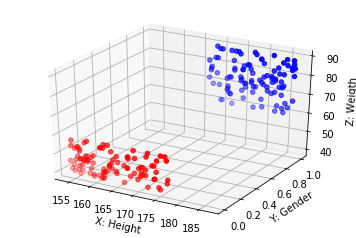

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot 200 points of all 3 features

ax.scatter(array_to_clust[:100,0], array_to_clust[:100,1], array_to_clust[:100,2], c = 'r')
ax.scatter(array_to_clust[100:,0], array_to_clust[100:,1], array_to_clust[100:,2], c = 'b')

ax.set_xlabel('X: Height')
ax.set_ylabel('Y: Gender')
ax.set_zlabel('Z: Weigth')

plt.show()

Clearly we have 2 clusters in our data. Let's now try to write k-means and see how it performs on the same data

**Algo:**
* Step 0: Normalize data. (Important step)
* Step 1: Randomly choose k centroids where k is argument of function
* Step 2: Find distance of all other points from chosen k points
* Step 3: Assign each point one of k cluster ids based on which centroid is closest to that point
* Step 4: Find centroid of each k group now and repeat from step 2
* Step 5: Stop when either maximum iterations are reached (argument) or when the clusters are not changing 


In [83]:
class kmeans():
    def __init__(self, k=2, max_iter = 300, tol =  0.001):
        """
        k: number of clusters
        max_iter: maximum number of iterations
        tol: tolerance value

        """

        self.k = k
        self.max_iter = max_iter
        self.tol = tol
    
    def fit(self, data):
        
        self.centroids = {} # empty dictionary for storing centroids
        
        # making k random initial centroids from data
        perm_data = np.random.permutation(data)
        
        for i in range(self.k):
            self.centroids[i] = perm_data[i]
            
        # now looping until it reaches maximum iterations
        for i in range(self.max_iter):
            print("Iteration: ", i)
            
            self.clusters = {} # assign new group on each iteration
            
            # make k empty lists. Each list will have all rows corresponding to that cluster
            for i in range(self.k):
                self.clusters[i] = [] 
            
            for row in data:
                distances = [np.linalg.norm(row - centroid) for centroid in self.centroids] # distance from all centroics
                cluster = distances.index(min(distances)) # index of whichever distance is minimum
                self.clusters[cluster].append(row) # now append this row into cluster number
                
            old_centroids = self.centroids
            
            # calculating new centroids for all clusters
            for clus_num in self.clusters:
                self.centroids[clus_num] = np.average(self.clusters[clus_num], axis=0)
            
            # now we need to check stopping condition. i.e. if algo is optimized even befoer reaching
            # max iterations, then break from the loop. 
            
            optimized = True
            
            for k in self.centroids:
                orig_cent = old_centroids[k]
                new_cent = self.centroids[k]
                
                if np.sum((new_cent - orig_cent)/(orig_cent+0.0001)*100.) > self.tol:
                    optimized=False
                    
            if optimized:
                break
    
    def predict(self, data):
        """
        gives cluster id of new data
        data: data to get predictions for
        
        """
        
        distances  = [np.linalg.norm(data - centroid) for centroid in self.centroids] 
        cluster = distances.index(min(distances))
        return cluster           

Fitting our data on k-means model now

In [34]:
mm  = MinMaxScaler()
mm.fit(array_to_clust)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [37]:
data = mm.transform(array_to_clust)

In [85]:
model =  kmeans(max_iter=4,  tol=0.0001)
model.fit(data)

Iteration:  0


In [86]:
model.centroids

{0: array([0.29733414, 0.        , 0.16816327]),
 1: array([0.71676432, 1.        , 0.7244898 ])}

In [57]:
model.clusters

{0: [array([0.30684682, 0.        , 0.2244898 ]),
  array([0.41316884, 0.        , 0.26530612]),
  array([0.38319582, 0.        , 0.18367347]),
  array([0.57891641, 0.        , 0.24489796]),
  array([0.07091727, 0.        , 0.        ]),
  array([0.68296402, 0.        , 0.08163265]),
  array([0.09156618, 0.        , 0.16326531]),
  array([0.33007772, 0.        , 0.26530612]),
  array([0.21463748, 0.        , 0.32653061]),
  array([0.38300994, 0.        , 0.        ]),
  array([0.05930343, 0.        , 0.04081633]),
  array([0.40842859, 0.        , 0.28571429]),
  array([0.15109567, 0.        , 0.20408163]),
  array([0.45000508, 0.        , 0.36734694]),
  array([0.59160442, 0.        , 0.24489796]),
  array([0.23727694, 0.        , 0.        ]),
  array([0.40769614, 0.        , 0.16326531]),
  array([0.01351082, 0.        , 0.04081633]),
  array([0.40608048, 0.        , 0.16326531]),
  array([0.47931537, 0.        , 0.06122449]),
  array([0.03180454, 0.        , 0.02040816]),
  array([0

We can see from above array that all the males fell in one cluser and females in another cluster. Let's plot it 

In [68]:
model.centroids[0]

array([0.29733414, 0.        , 0.16816327])

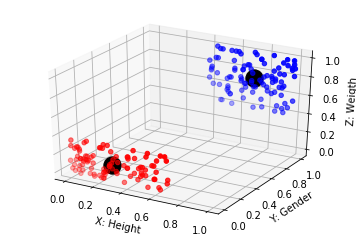

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot 200 points of all 3 features

# 0th cluster
ax.scatter([m[0] for m in model.clusters[0]],
           [m[1] for m in model.clusters[0]], 
           [m[2] for m in model.clusters[0]], c = 'r')

# 1st cluster
ax.scatter([m[0] for m in model.clusters[1]], 
           [m[1] for m in model.clusters[1]], 
           [m[2] for m in model.clusters[1]], c = 'b')

# centroids
ax.scatter(model.centroids[0][0], 
           model.centroids[0][1], 
           model.centroids[0][2], c = 'k', s = 300)

ax.scatter(model.centroids[1][0], 
           model.centroids[1][1], 
           model.centroids[1][2], c = 'k', s = 300)


ax.set_xlabel('X: Height')
ax.set_ylabel('Y: Gender')
ax.set_zlabel('Z: Weigth')

plt.show()

### End 